In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization


import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(11))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [3]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [5]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('#sd/content/drive/MyDrive/Research/FFF/Test',
                                            target_size = (224, 224),
                                            batch_size = 255,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.


FileNotFoundError: ignored

In [ ]:
r = AlexNet.fit(
  training_set,
  validation_data=test_set,
  epochs=25
)

Epoch 1/25


InvalidArgumentError: ignored

In [ ]:
######## &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [6]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [7]:
path = '/content/drive/MyDrive/Research/FFF/Train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224,224),batch_size = 128, class_mode='categorical')

Found 3835 images belonging to 11 classes.


In [8]:
#
path = '/content/drive/MyDrive/Research/FFF/Test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
testt = test_datagen.flow_from_directory(path, target_size=(224,224),batch_size = 255, class_mode='categorical')


Found 255 images belonging to 11 classes.


In [9]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (128, 224, 224, 3)
Batch Size for Output Image :  (128, 11)
Image Size of first image :  (224, 224, 3)
Output of first image :  (11,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

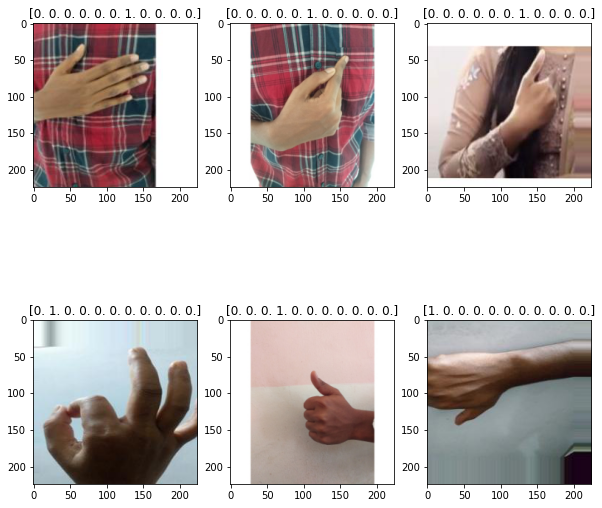

In [10]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [11]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    #X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    #X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    #X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(11,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [12]:
alex = AlexNet(train[0][0].shape[1:])


In [13]:
alex.summary()


Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 54, 54, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 54, 54, 96)        384       
                                                                 
 activation_9 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 26, 26, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 26, 26, 256)       1024

In [14]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Test',
                                            target_size = (224, 224),
                                            batch_size = 255,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.
Found 255 images belonging to 11 classes.


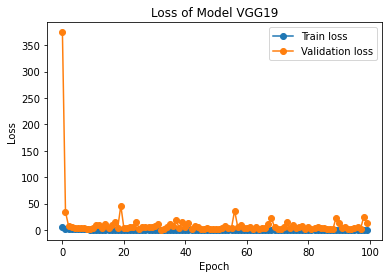

<Figure size 432x288 with 0 Axes>

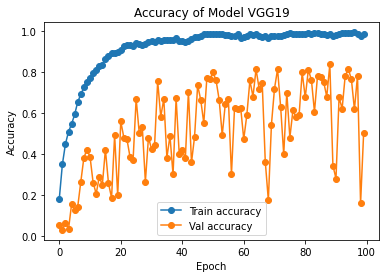

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy
plt.plot(r.history['accuracy'],'o-', label='Train accuracy')
plt.plot(r.history['val_accuracy'],'o-', label='Val accuracy')
plt.title("Accuracy of Model VGG19")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


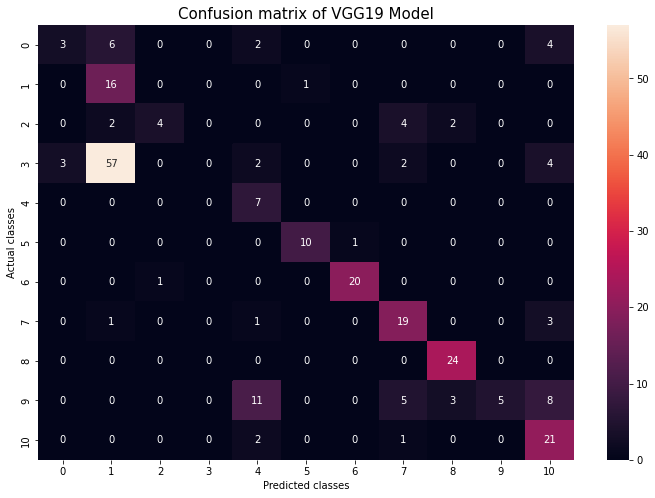

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set
x_test, y_test = next(val_ds)
y_predict = alex.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of VGG19 Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

In [15]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set1 = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set1 = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Test_p',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.
Found 764 images belonging to 11 classes.


In [16]:
r = alex.fit(
  training_set1,
  validation_data=test_set1,
  epochs=25,
  steps_per_epoch=len(training_set1),
  validation_steps=len(test_set1)
)

Epoch 1/25
30/30 [==============================] - 1076s 36s/step - loss: 5.5142 - accuracy: 0.1937 - val_loss: 370.6961 - val_accuracy: 0.0890
Epoch 2/25
30/30 [==============================] - 51s 2s/step - loss: 2.1353 - accuracy: 0.3429 - val_loss: 21.7548 - val_accuracy: 0.0916
Epoch 3/25
30/30 [==============================] - 50s 2s/step - loss: 1.5262 - accuracy: 0.4827 - val_loss: 16.6773 - val_accuracy: 0.0589
Epoch 4/25
30/30 [==============================] - 50s 2s/step - loss: 1.3867 - accuracy: 0.5492 - val_loss: 6.4844 - val_accuracy: 0.1518
Epoch 5/25
30/30 [==============================] - 50s 2s/step - loss: 1.2618 - accuracy: 0.5784 - val_loss: 4.8181 - val_accuracy: 0.1427
Epoch 6/25
30/30 [==============================] - 50s 2s/step - loss: 1.1716 - accuracy: 0.6519 - val_loss: 3.5961 - val_accuracy: 0.1728
Epoch 7/25
30/30 [==============================] - 50s 2s/step - loss: 1.0354 - accuracy: 0.6853 - val_loss: 3.5890 - val_accuracy: 0.1217
Epoch 8/25
30

In [17]:
r = alex.fit(
  training_set1,
  validation_data=test_set1,
  epochs=50,
  steps_per_epoch=len(training_set1),
  validation_steps=len(test_set1),
  initial_epoch=25
)

Epoch 26/50
30/30 [==============================] - 50s 2s/step - loss: 0.2213 - accuracy: 0.9249 - val_loss: 8.9687 - val_accuracy: 0.4188
Epoch 27/50
30/30 [==============================] - 50s 2s/step - loss: 0.1807 - accuracy: 0.9439 - val_loss: 3.8522 - val_accuracy: 0.5393
Epoch 28/50
30/30 [==============================] - 49s 2s/step - loss: 0.1971 - accuracy: 0.9359 - val_loss: 1.1820 - val_accuracy: 0.7461
Epoch 29/50
30/30 [==============================] - 49s 2s/step - loss: 0.1643 - accuracy: 0.9468 - val_loss: 3.4546 - val_accuracy: 0.5890
Epoch 30/50
30/30 [==============================] - 49s 2s/step - loss: 0.1359 - accuracy: 0.9536 - val_loss: 1.7867 - val_accuracy: 0.6531
Epoch 31/50
30/30 [==============================] - 50s 2s/step - loss: 0.1353 - accuracy: 0.9554 - val_loss: 4.3388 - val_accuracy: 0.6073
Epoch 32/50
30/30 [==============================] - 49s 2s/step - loss: 0.1184 - accuracy: 0.9609 - val_loss: 6.8560 - val_accuracy: 0.4935
Epoch 33/50
3

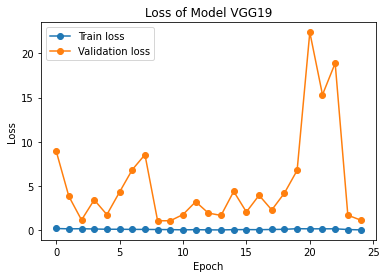

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'],'o-', label='Train loss')
plt.plot(r.history['val_loss'],'o-', label='Validation loss')
plt.title("Loss of Model VGG19")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')





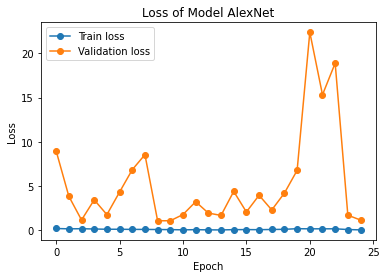

<Figure size 432x288 with 0 Axes>

In [25]:
# loss
plt.plot(r.history['loss'],'o-', label='Train loss')
plt.plot(r.history['val_loss'],'o-', label='Validation loss')
plt.title("Loss of Model AlexNet")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')





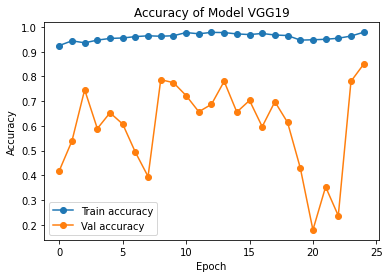

<Figure size 432x288 with 0 Axes>

In [19]:
# accuracy
plt.plot(r.history['accuracy'],'o-', label='Train accuracy')
plt.plot(r.history['val_accuracy'],'o-', label='Val accuracy')
plt.title("Accuracy of Model VGG19")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


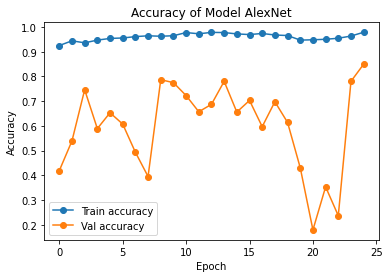

<Figure size 432x288 with 0 Axes>

In [24]:
# accuracy
plt.plot(r.history['accuracy'],'o-', label='Train accuracy')
plt.plot(r.history['val_accuracy'],'o-', label='Val accuracy')
plt.title("Accuracy of Model AlexNet")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [21]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set2 = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set2 = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Test_p',
                                            target_size = (224, 224),
                                            batch_size = 255,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.
Found 764 images belonging to 11 classes.


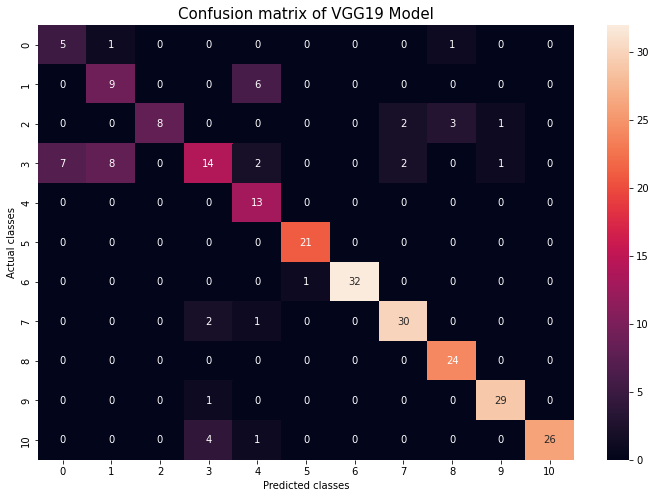

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set2
x_test, y_test = next(val_ds)
y_predict = alex.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of VGG19 Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

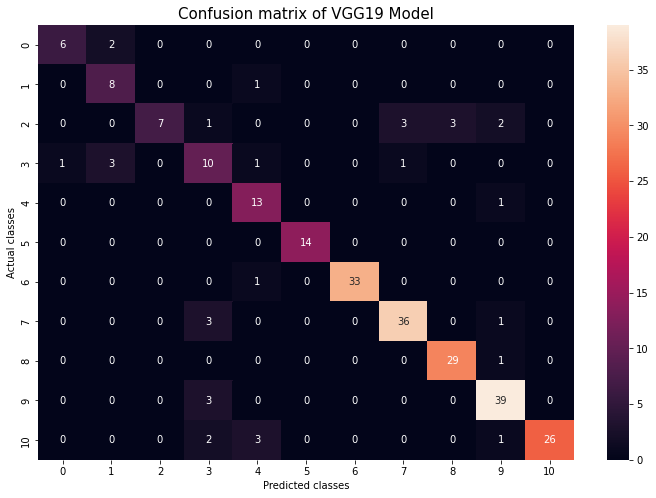

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set2
x_test, y_test = next(val_ds)
y_predict = alex.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of AlexNet Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

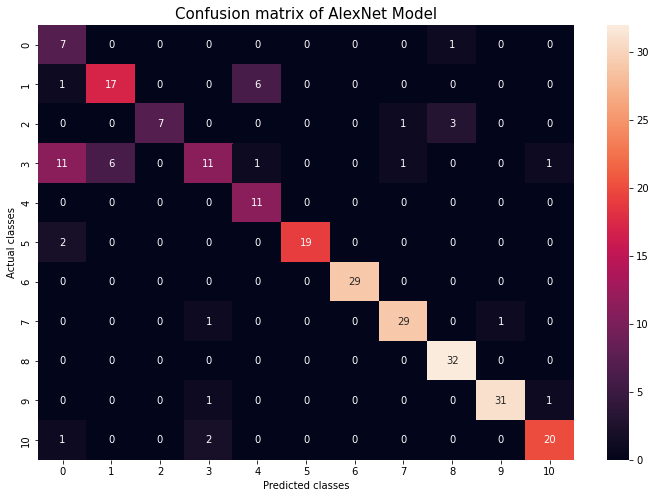

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set2
x_test, y_test = next(val_ds)
y_predict = alex.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of AlexNet Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

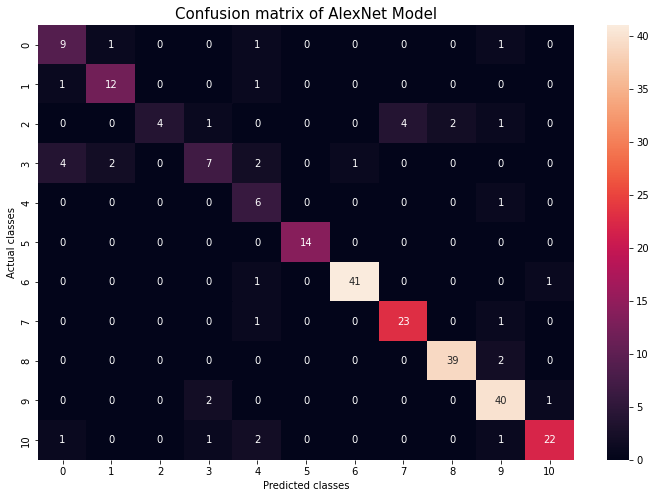

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set2
x_test, y_test = next(val_ds)
y_predict = alex.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of AlexNet Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

In [29]:

import tensorflow as tf

from keras.models import load_model

alex.save('alex84.h5')

In [30]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(classes,test))

the accuracy obtained on the test set is: 0.8666666666666667


In [31]:
from sklearn.metrics import classification_report
print(classification_report(test, classes))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.62      0.89      0.73         9
           2       1.00      0.44      0.61        16
           3       0.53      0.62      0.57        16
           4       0.68      0.93      0.79        14
           5       1.00      1.00      1.00        14
           6       1.00      0.97      0.99        34
           7       0.90      0.90      0.90        40
           8       0.91      0.97      0.94        30
           9       0.87      0.93      0.90        42
          10       1.00      0.81      0.90        32

    accuracy                           0.87       255
   macro avg       0.85      0.84      0.83       255
weighted avg       0.89      0.87      0.87       255



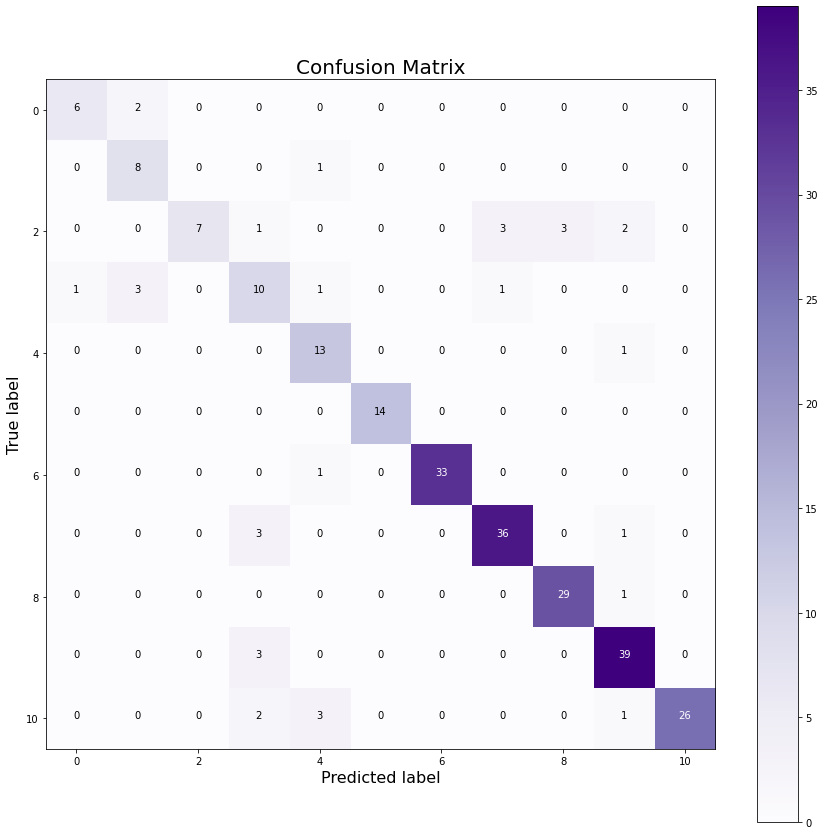

In [33]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    #tick_marks = np.arange(len(labels))
    #plt.xticks(tick_marks, labels, rotation=45)
    #plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = alex.predict(x_test, batch_size = 128, verbose = 0)
plot_confusion_matrix(test, classes)